# Solar Forecasting Data - Exploratory Data Analysis

**Objective:** Explore electricity import/export patterns to understand solar generation behavior across different accounts and months.

## 1. Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 5)

df = pd.read_csv('../../processed/MASTER_DATASET_ALL_10TRANSFORMERS.csv')
print(f"Loaded: {len(df):,} records, {df['ACCOUNT_NO'].nunique()} accounts, {df['MONTH'].nunique()} months")

Loaded: 8,064 records, 672 accounts, 12 months


In [2]:
df.head()

,TRANSFORMER_CODE,TRANSFORMER_LAT,TRANSFORMER_LON,ACCOUNT_NO,CUSTOMER_LAT,CUSTOMER_LON,MONTH,YEAR,IMPORT_kWh,EXPORT_kWh,NET_CONSUMPTION_kWh,HAS_SOLAR,INV_CAPACITY,CAL_TARIFF,PHASE,DATA_QUALITY,DISTANCE_FROM_TF_M,SOURCE
0,AZ0001,6.8514,79.9211,703376102,6.851293,79.920845,1,2025,126.30,0.0,126.30,0,0.0,D1,SP,SYNTHETIC,30.623477,REAL
1,AZ0001,6.8514,79.9211,703376102,6.851293,79.920845,2,2025,124.01,0.0,124.01,0,0.0,D1,SP,SYNTHETIC,30.623477,REAL
2,AZ0001,6.8514,79.9211,703376102,6.851293,79.920845,3,2025,167.33,0.0,167.33,0,0.0,D1,SP,SYNTHETIC,30.623477,REAL
3,AZ0001,6.8514,79.9211,703376102,6.851293,79.920845,4,2025,183.01,0.0,183.01,0,0.0,D1,SP,SYNTHETIC,30.623477,REAL
4,AZ0001,6.8514,79.9211,703376102,6.851293,79.920845,5,2025,159.94,0.0,159.94,0,0.0,D1,SP,SYNTHETIC,30.623477,REAL


## 2. Solar vs Non-Solar Accounts

In [3]:
# Split data
solar = df[df['HAS_SOLAR'] == 1].copy()
non_solar = df[df['HAS_SOLAR'] == 0].copy()

print(f"Solar accounts: {solar['ACCOUNT_NO'].nunique()}")
print(f"Non-solar accounts: {non_solar['ACCOUNT_NO'].nunique()}")
print(f"\nSolar records: {len(solar)}")
print(f"Non-solar records: {len(non_solar)}")

Solar accounts: 253
Non-solar accounts: 419

Solar records: 3036
Non-solar records: 5028


## 3. Export Patterns (Solar Accounts Only)

In [4]:
# Monthly export statistics
monthly_export = solar.groupby('MONTH')['EXPORT_kWh'].agg(['mean', 'std', 'min', 'max', 'count'])
print("Monthly Export Statistics (kWh):")
monthly_export.round(2)

Monthly Export Statistics (kWh):


,mean,std,min,max,count
MONTH,,,,,
1,478.13,115.53,228.66,1000.00,253
2,502.47,125.46,195.68,1000.00,253
3,522.53,128.84,233.75,1000.00,253
4,500.54,123.21,256.18,1000.00,253
5,430.92,111.30,191.60,1000.00,253
6,259.62,70.39,120.38,801.31,253
7,282.24,79.04,139.90,916.99,253
8,309.65,89.10,138.38,1000.00,253
9,438.10,158.42,122.66,1620.02,253


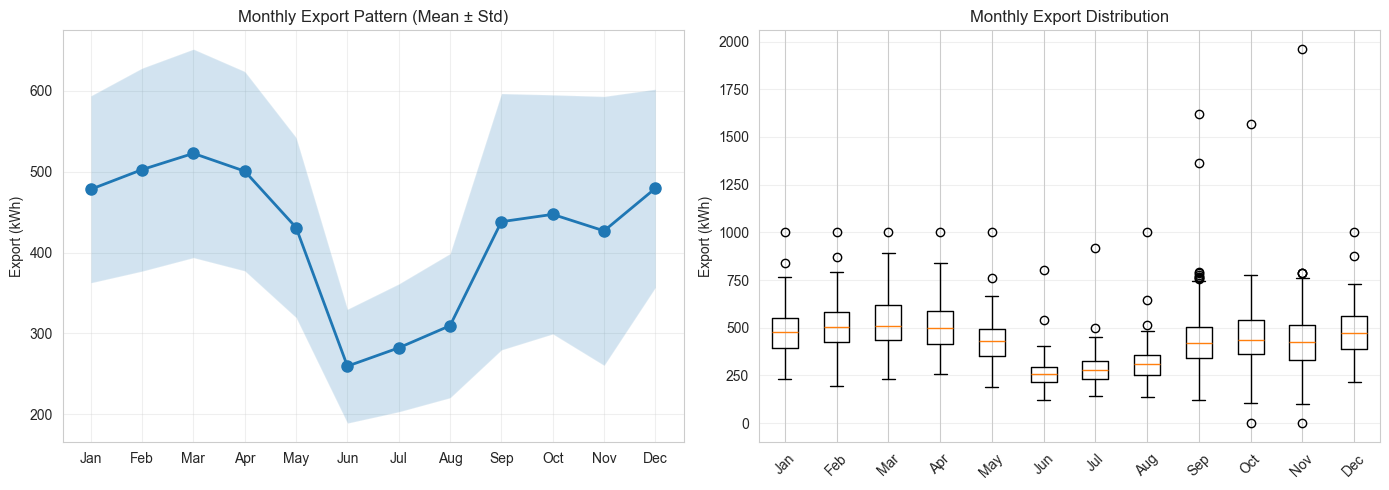


Variation: 260 - 523 kWh
Highest: Mar
Lowest: Jun


In [5]:
# Visualize monthly export pattern
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Line plot
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0].plot(monthly_export.index, monthly_export['mean'], marker='o', linewidth=2, markersize=8)
axes[0].fill_between(monthly_export.index, 
                      monthly_export['mean'] - monthly_export['std'],
                      monthly_export['mean'] + monthly_export['std'],
                      alpha=0.2)
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(months)
axes[0].set_ylabel('Export (kWh)')
axes[0].set_title('Monthly Export Pattern (Mean ± Std)')
axes[0].grid(True, alpha=0.3)

# Box plot
solar_monthly = [solar[solar['MONTH'] == m]['EXPORT_kWh'].values for m in range(1, 13)]
axes[1].boxplot(solar_monthly, labels=months)
axes[1].set_ylabel('Export (kWh)')
axes[1].set_title('Monthly Export Distribution')
axes[1].grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f"\nVariation: {monthly_export['mean'].min():.0f} - {monthly_export['mean'].max():.0f} kWh")
print(f"Highest: {months[monthly_export['mean'].idxmax()-1]}")
print(f"Lowest: {months[monthly_export['mean'].idxmin()-1]}")

## 4. Import Patterns

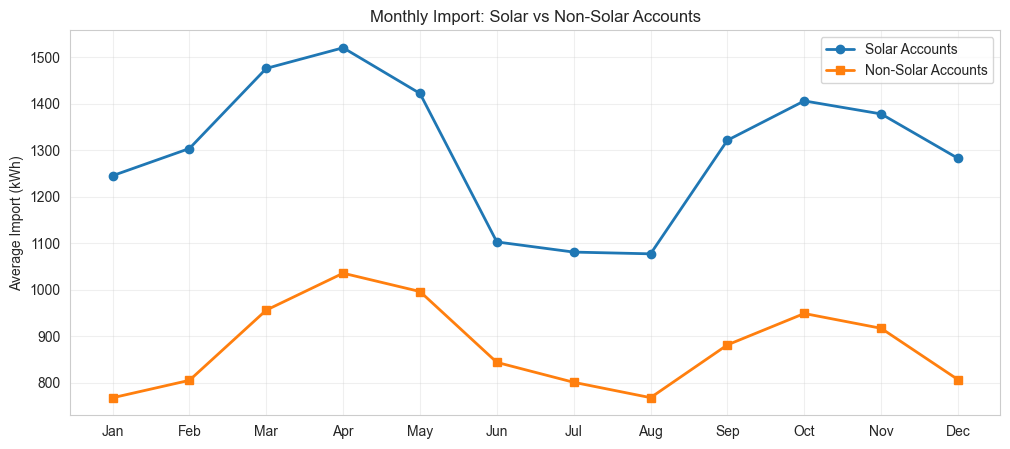

Solar avg import: 1301.0 kWh
Non-solar avg import: 876.9 kWh


In [6]:
# Compare solar vs non-solar monthly import
monthly_import_solar = solar.groupby('MONTH')['IMPORT_kWh'].mean()
monthly_import_nonsolar = non_solar.groupby('MONTH')['IMPORT_kWh'].mean()

plt.figure(figsize=(12, 5))
plt.plot(monthly_import_solar.index, monthly_import_solar.values, 
         marker='o', label='Solar Accounts', linewidth=2)
plt.plot(monthly_import_nonsolar.index, monthly_import_nonsolar.values, 
         marker='s', label='Non-Solar Accounts', linewidth=2)
plt.xticks(range(1, 13), months)
plt.ylabel('Average Import (kWh)')
plt.title('Monthly Import: Solar vs Non-Solar Accounts')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Solar avg import: {solar['IMPORT_kWh'].mean():.1f} kWh")
print(f"Non-solar avg import: {non_solar['IMPORT_kWh'].mean():.1f} kWh")

## 5. Account-Level Variation

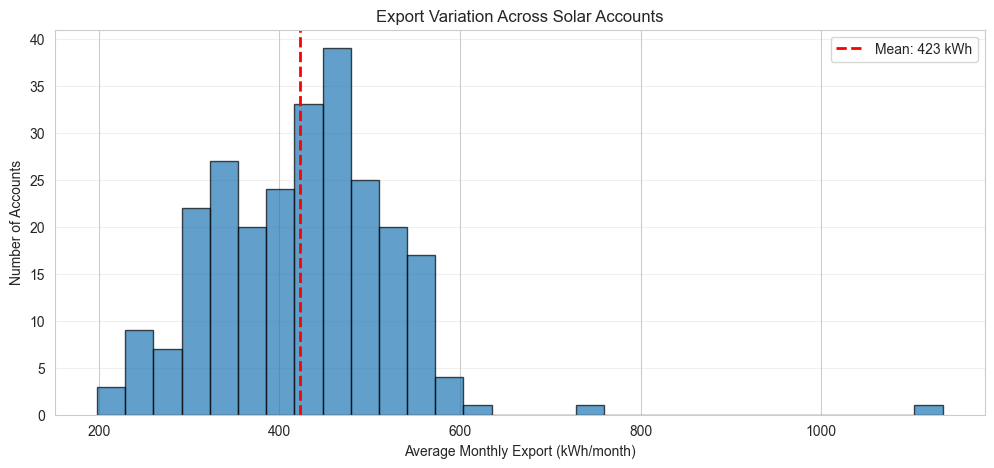

Export range: 198 - 1134 kWh
Standard deviation: 101 kWh


In [7]:
# How much does export vary between different solar accounts?
account_avg_export = solar.groupby('ACCOUNT_NO')['EXPORT_kWh'].mean()

plt.figure(figsize=(12, 5))
plt.hist(account_avg_export, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(account_avg_export.mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {account_avg_export.mean():.0f} kWh')
plt.xlabel('Average Monthly Export (kWh/month)')
plt.ylabel('Number of Accounts')
plt.title('Export Variation Across Solar Accounts')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

print(f"Export range: {account_avg_export.min():.0f} - {account_avg_export.max():.0f} kWh")
print(f"Standard deviation: {account_avg_export.std():.0f} kWh")

## 6. Inverter Capacity vs Export

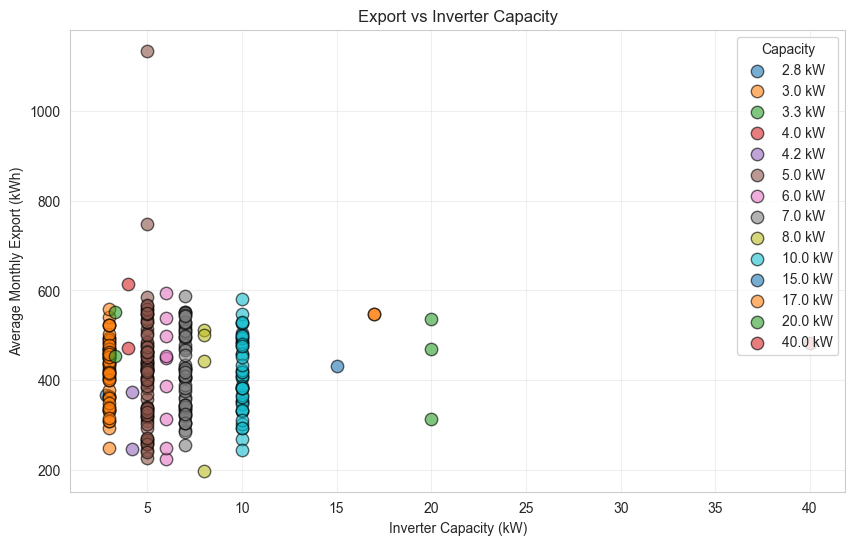

Correlation: 0.037


In [8]:
# Does bigger capacity = more export?
account_data = solar.groupby('ACCOUNT_NO').agg({
    'EXPORT_kWh': 'mean',
    'INV_CAPACITY': 'first'
}).reset_index()

plt.figure(figsize=(10, 6))
for cap in sorted(account_data['INV_CAPACITY'].unique()):
    data = account_data[account_data['INV_CAPACITY'] == cap]
    plt.scatter(data['INV_CAPACITY'], data['EXPORT_kWh'], 
               s=80, alpha=0.6, label=f'{cap} kW', edgecolor='black')

plt.xlabel('Inverter Capacity (kW)')
plt.ylabel('Average Monthly Export (kWh)')
plt.title('Export vs Inverter Capacity')
plt.legend(title='Capacity')
plt.grid(True, alpha=0.3)
plt.show()

# Calculate correlation
corr = account_data[['INV_CAPACITY', 'EXPORT_kWh']].corr().iloc[0, 1]
print(f"Correlation: {corr:.3f}")

## 7. Sample Account Timeseries

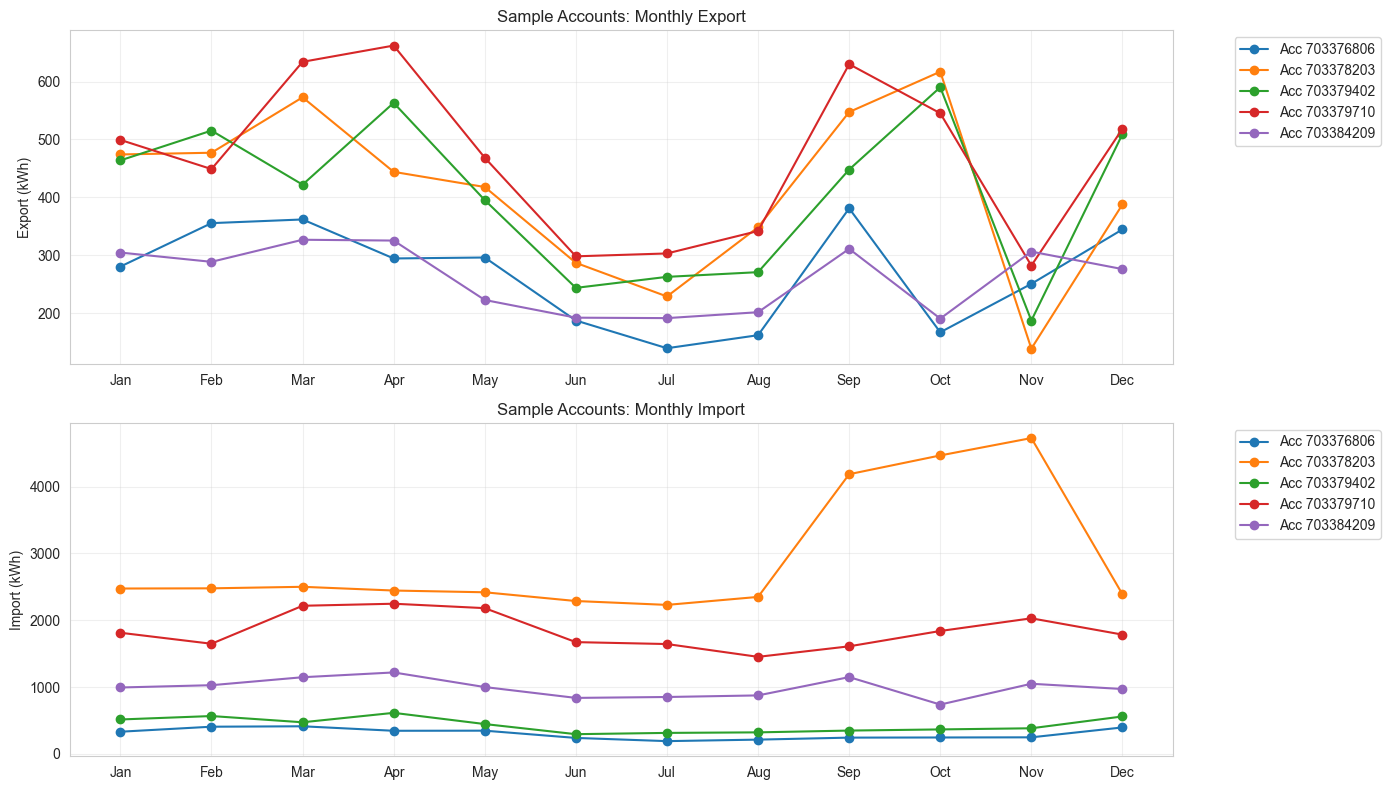

In [9]:
# Look at a few individual solar accounts over time
sample_accounts = solar['ACCOUNT_NO'].unique()[:5]  # First 5 solar accounts

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Export over time
for acc in sample_accounts:
    acc_data = solar[solar['ACCOUNT_NO'] == acc].sort_values('MONTH')
    axes[0].plot(acc_data['MONTH'], acc_data['EXPORT_kWh'], marker='o', label=f'Acc {acc}')

axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(months)
axes[0].set_ylabel('Export (kWh)')
axes[0].set_title('Sample Accounts: Monthly Export')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True, alpha=0.3)

# Import over time
for acc in sample_accounts:
    acc_data = solar[solar['ACCOUNT_NO'] == acc].sort_values('MONTH')
    axes[1].plot(acc_data['MONTH'], acc_data['IMPORT_kWh'], marker='o', label=f'Acc {acc}')

axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(months)
axes[1].set_ylabel('Import (kWh)')
axes[1].set_title('Sample Accounts: Monthly Import')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Data Quality Check

In [10]:
# Check which data is real vs synthetic
quality = df['DATA_QUALITY'].value_counts()
print("Data Quality:")
for q, count in quality.items():
    print(f"  {q}: {count:,} ({count/len(df)*100:.1f}%)")

Data Quality:
  SYNTHETIC: 7,617 (94.5%)
  REAL: 436 (5.4%)
  FILLED: 11 (0.1%)
